# Importing Libraries

In [1]:
!pip install -U scikit-learn==1.2.2 imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,confusion_matrix,classification_report
from tensorflow.keras import layers

import joblib

2025-05-04 20:39:38.909214: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746391179.245683      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746391179.353971      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Reading the data

In [3]:
df = pd.read_csv('/kaggle/input/weatheraus/weatherAUS.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
df.shape

(142193, 24)

In [7]:
df.isnull().sum().sort_values(ascending=False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
RISK_MM              0
Date                 0
Location             0
RainTomorrow         0
dtype: int64

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [9]:
df = df.drop(columns=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'])

In [10]:
df.shape

(142193, 20)

In [11]:
df.isnull().sum().sort_values(ascending=False)

Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
RISK_MM              0
Date                 0
Location             0
RainTomorrow         0
dtype: int64

# Feature engineering on date column

In [12]:
# Ensure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns for year, month, and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Dropping the Date column
df = df.drop(columns=['Date'])

In [13]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,1007.7,1007.1,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,1010.6,1007.8,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,1007.6,1008.7,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,1017.6,1012.8,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,1010.8,1006.0,17.8,29.7,No,0.2,No,2008,12,5


In [14]:
df.shape

(142193, 22)

# Filling the null values

In [15]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')#'median', 'mean', 'constant', 'most_frequent'

# Loop through each numeric column and apply the imputer
for col in numeric_cols:
    df[col] = imputer.fit_transform(df[[col]])

In [16]:
# Select string (object or category) columns
string_cols = df.select_dtypes(include=['object', 'category']).columns

# Create the imputer (fill missing strings with the most frequent value)
imputer = SimpleImputer(strategy='most_frequent')  # or strategy='constant', fill_value='Unknown'

# Loop through each string column and apply the imputer
for col in string_cols:
    df[col] = imputer.fit_transform(df[[col]]).ravel()

In [17]:
df.isnull().sum().sort_values(ascending=False)

Location         0
MinTemp          0
Month            0
Year             0
RainTomorrow     0
RISK_MM          0
RainToday        0
Temp3pm          0
Temp9am          0
Pressure3pm      0
Pressure9am      0
Humidity3pm      0
Humidity9am      0
WindSpeed3pm     0
WindSpeed9am     0
WindDir3pm       0
WindDir9am       0
WindGustSpeed    0
WindGustDir      0
Rainfall         0
MaxTemp          0
Day              0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

# Removing outliers

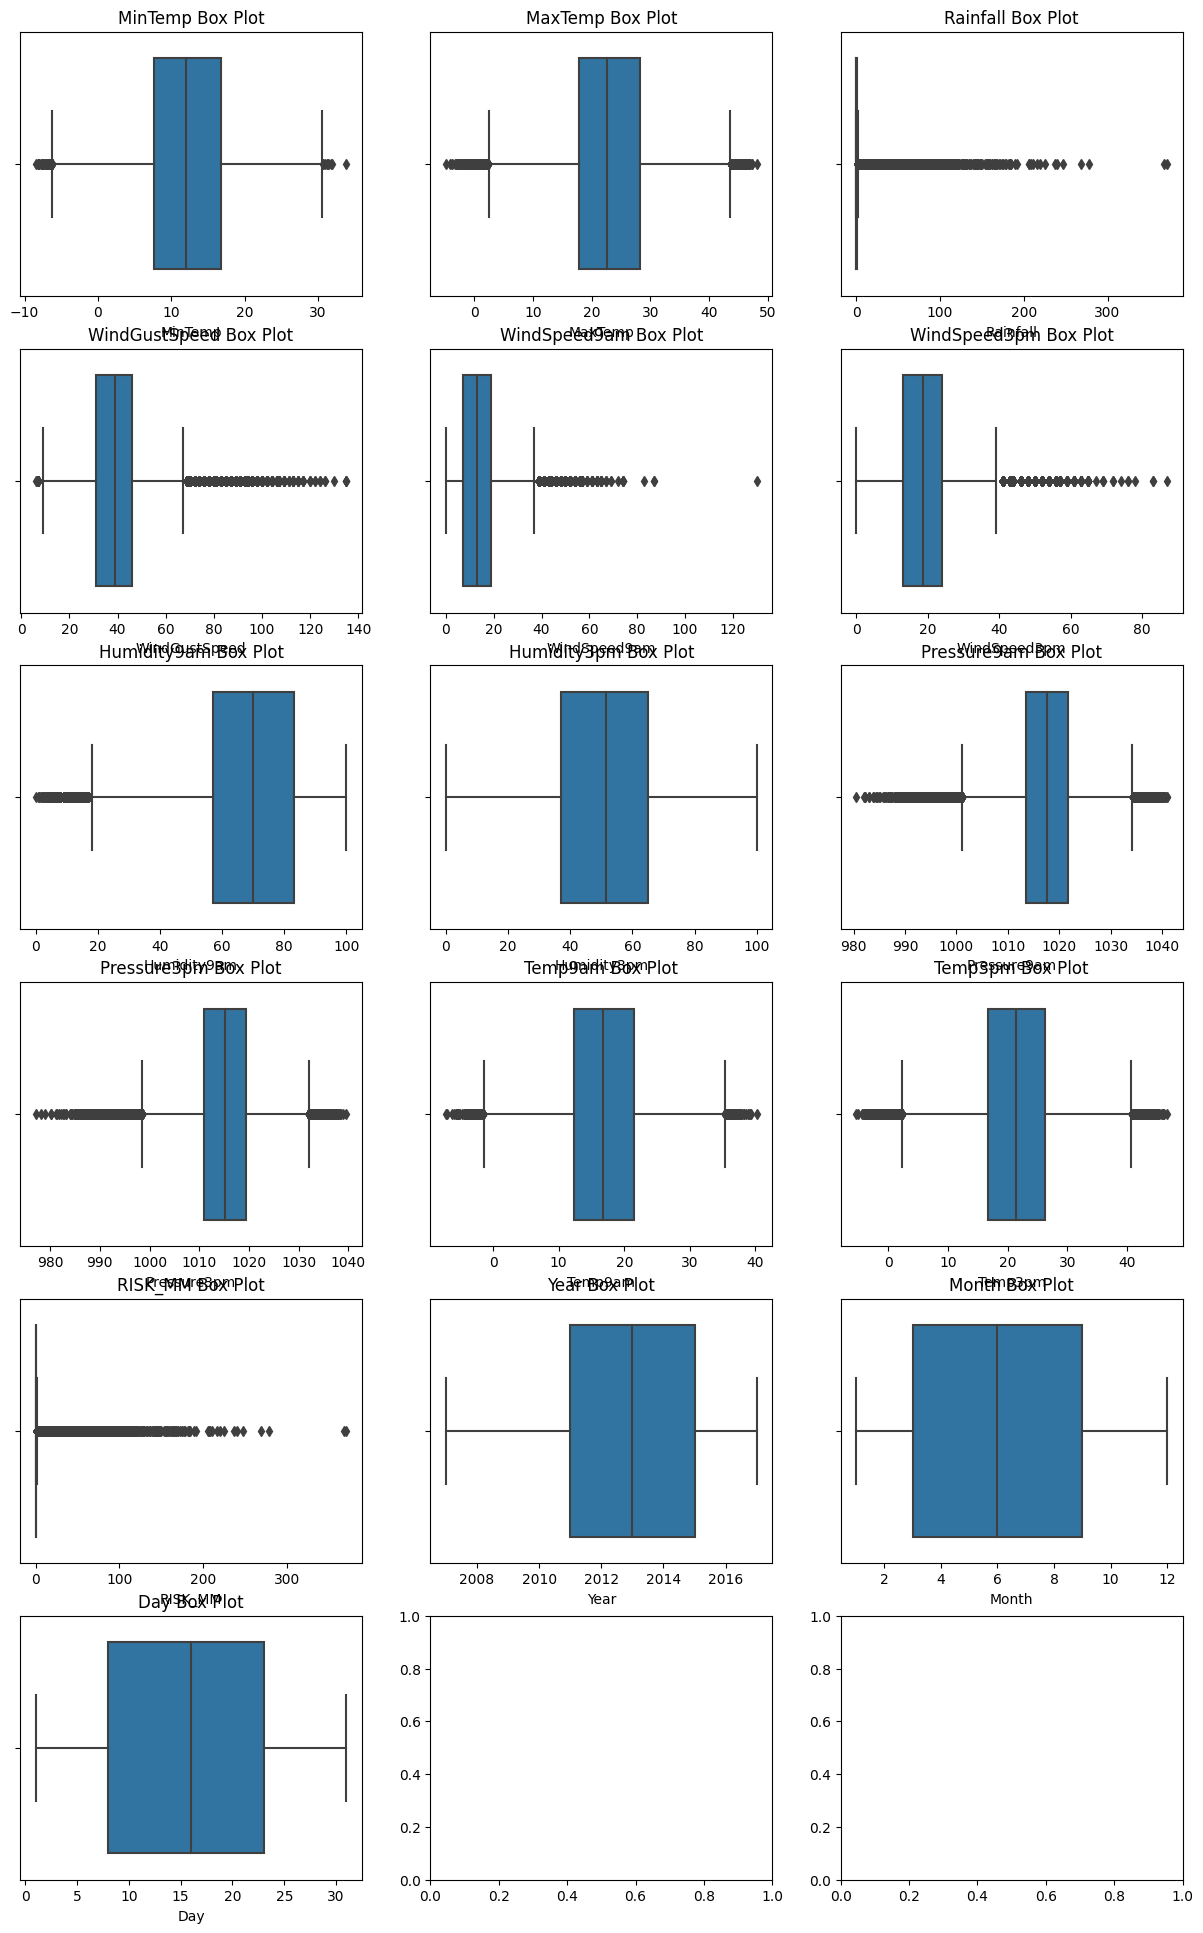

In [20]:
# Set grid size based on number of numeric columns
n_cols = 3  # e.g., 3 plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # Flatten to easily index

# Create boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'{col} Box Plot')

In [21]:
target_col = 'RainTomorrow'
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col != target_col]

# Create a mask to keep track of outliers
mask = pd.Series(True, index=df.index)

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3.0 * iqr
    upper_bound = q3 + 3.0 * iqr

    mask &= (df[col] >= lower_bound) & (df[col] <= upper_bound)

# Instead of applying it directly, check how many 'Yes' values remain
print("Before:", df[target_col].value_counts())

# Apply mask only if it doesn't destroy your 'Yes' values
filtered_df = df[mask]

print("After:", filtered_df[target_col].value_counts())

Before: RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64
After: RainTomorrow
No     100354
Yes      8018
Name: count, dtype: int64


target_col = 'RainTomorrow'  # Replace with your actual target column name

for col in numeric_cols:
    if col == target_col:
        continue  # Skip the target column
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3.0 * iqr
    upper_bound = q3 + 3.0 * iqr

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

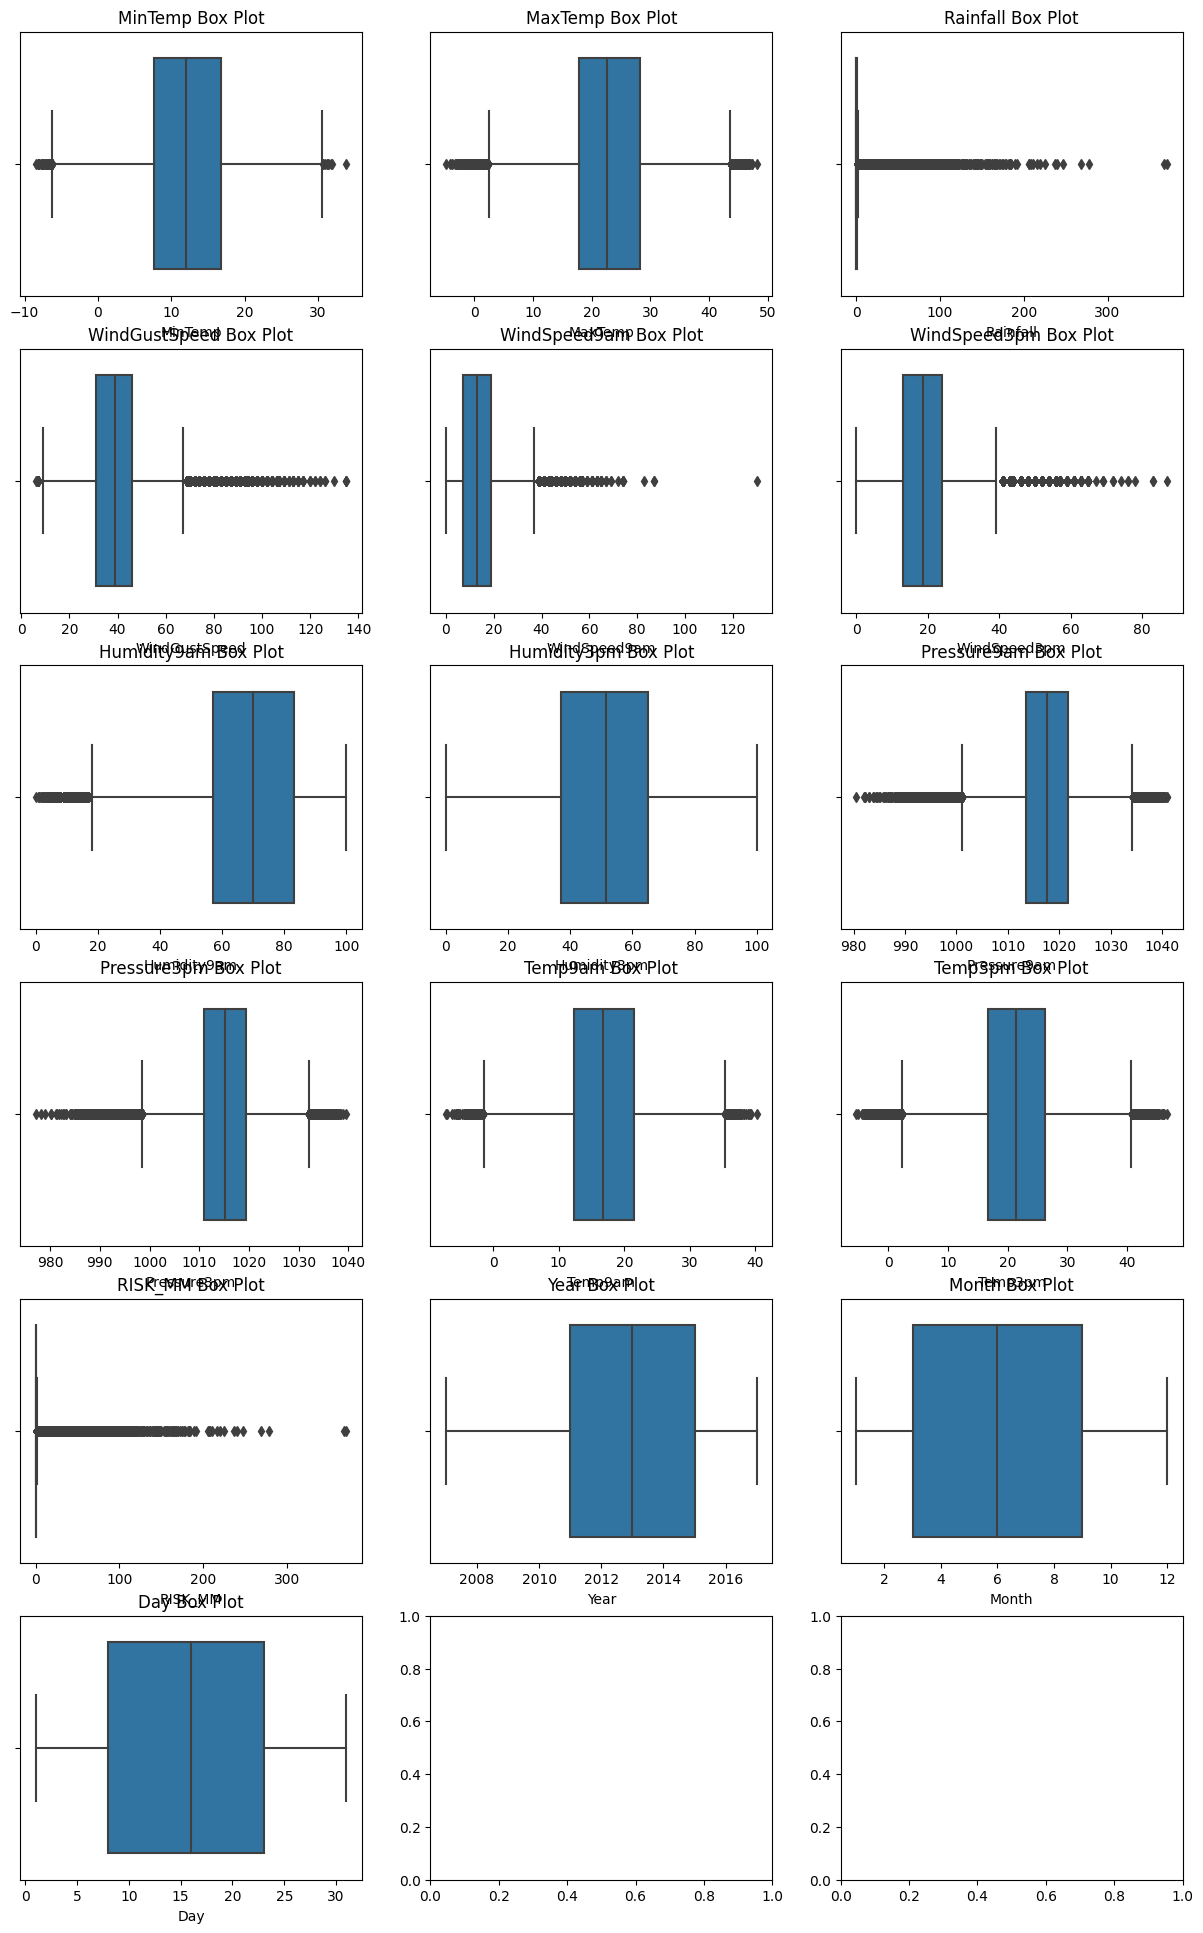

In [22]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # Flatten to easily index

# Create boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'{col} Box Plot')

In [23]:
df.shape

(142193, 22)

In [24]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

# Important Note

**As we see the shape of the dataset before and after removing the outliers are equaled**
**And thats because all the outliers are from class 'Yes' in target column**

# Encoding

In [25]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [26]:
lb=LabelEncoder()
df['Location'] = lb.fit_transform(df['Location'])
joblib.dump(lb,'Location.joblib')


lb=LabelEncoder()
df['WindGustDir'] = lb.fit_transform(df['WindGustDir'])
joblib.dump(lb,'WindGustDir.joblib')

lb=LabelEncoder()
df['WindDir9am'] = lb.fit_transform(df['WindDir9am'])
joblib.dump(lb,'WindDir9am.joblib')

lb=LabelEncoder()
df['WindDir3pm'] = lb.fit_transform(df['WindDir3pm'])
joblib.dump(lb,'WindDir3pm.joblib')

lb=LabelEncoder()
df['RainToday'] = lb.fit_transform(df['RainToday'])
joblib.dump(lb,'RainToday.joblib')

lb=LabelEncoder()
df['RainTomorrow'] = lb.fit_transform(df['RainTomorrow'])
joblib.dump(lb,'RainTomorrow.joblib')

['RainTomorrow.joblib']

In [27]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,1007.7,1007.1,16.9,21.8,0,0.0,0,2008.0,12.0,1.0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,1010.6,1007.8,17.2,24.3,0,0.0,0,2008.0,12.0,2.0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,1007.6,1008.7,21.0,23.2,0,0.0,0,2008.0,12.0,3.0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,1017.6,1012.8,18.1,26.5,0,1.0,0,2008.0,12.0,4.0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,1010.8,1006.0,17.8,29.7,0,0.2,0,2008.0,12.0,5.0


In [28]:
df['RainTomorrow'].unique()

array([0, 1])

# Splitting the data

In [29]:
x = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

In [30]:
#changing x and y to dataframes
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                   test_size= 0.20, random_state=100, stratify=y)

# Scaling

In [32]:
scaler_X = MinMaxScaler(feature_range=(0,1))
x_train_scaled = scaler_X.fit_transform(x_train)
x_test_scaled  = scaler_X.transform(x_test)

joblib.dump(scaler_X,f'Scaling.joblib')

['Scaling.joblib']

# Machine Learning Models

In [33]:
models ={
    #'LogisticRegression' : LogisticRegression(),
    #'GaussianNB' : GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier( max_depth=10,random_state=42),
    #'Random Forest Classifier': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    #'KNN Classifier': KNeighborsClassifier(n_neighbors=5),
    #'SVC': SVC(kernel='linear', C=1.0)
}

In [34]:
accuracy = []
conf_matrices = {}

from tqdm import tqdm
for model_name, model in tqdm(models.items()):
    # Train
    model.fit(x_train_scaled, y_train)


    # Predict once on train and once on test
    y_pred_train = model.predict(x_train_scaled)
    y_pred_test  = model.predict(x_test_scaled)
    
    # Compute train metrics
    acc_train      = accuracy_score(y_train, y_pred_train)
    pres_train     = precision_score(y_train, y_pred_train, average='weighted')
    recall_train   = recall_score(y_train, y_pred_train, average='weighted')
    f1_train       = f1_score(y_train, y_pred_train, average='weighted')
    
    # Compute test metrics
    acc_test       = accuracy_score(y_test, y_pred_test)
    pres_test      = precision_score(y_test, y_pred_test, average='weighted')
    recall_test    = recall_score(y_test, y_pred_test, average='weighted')
    f1_test        = f1_score(y_test, y_pred_test, average='weighted')
    
    # Store results
    accuracy.append([
        acc_train, pres_train, recall_train, f1_train,
        acc_test,  pres_test,  recall_test,  f1_test
    ])
    # Save confusion matrix for test set
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred_test)

    joblib.dump(model,f'model.joblib')

100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


In [35]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train",
                               "F1_Train","Acc_Test","pre_Test",
                               "Rec_Test","F1_Test"],index=models.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,pre_Test,Rec_Test,F1_Test
Decision Tree Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Confusion Matrix

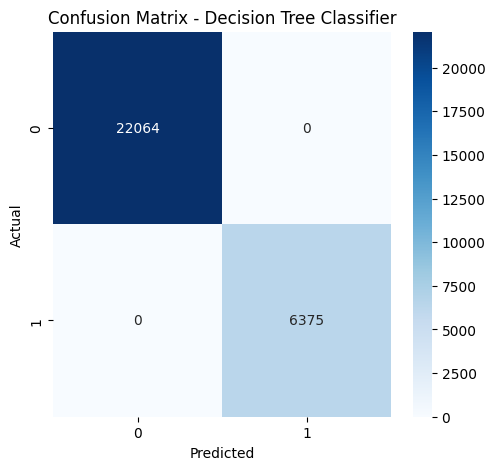

In [36]:
n_models = len(conf_matrices)
n_cols = 2
n_rows = (n_models + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for idx, (model_name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix - {model_name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# If there are empty subplots, remove them
for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])

In [37]:
x_train.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'Year',
       'Month', 'Day'],
      dtype='object')